# Code Analysis and Libraries
---

To start our analysis, we need to import several libraries that will be used throughout the code. The following libraries are imported:

>- **pandas**: A library for data manipulation and analysis.
>- **seaborn**: A data visualization library based on matplotlib.
>- **matplotlib.pyplot**: A plotting library for creating visualizations
>- **sklearn**: A comprehensive machine learning library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC , SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# Data Loading and Preprocessing
---
To begin our analysis, we need to load the training and testing data from CSV files and perform some preprocessing steps. The process involves the following steps:

1. Load the training CSV file.
2. Split the training data into input features (X) and target variable (y).
3. Preprocess the input features by performing necessary transformations.
4. Load the testing CSV file.
5. Split the testing data into input features (X_test) and target variable (y_test).
6. Preprocess the input features for the testing data.

## Load the Training Data

>The training data is loaded from the 'train.csv' file. This file contains the data needed for training our model.



In [2]:
data = pd.read_csv('train.csv').dropna()

## Split the Training Data and Preprocess the Input Features
---
>The training data is split into input features (X) and the corresponding target variable (y). The input features contain all columns except the 'weather' column, which is our target variable.

>Some preprocessing steps are applied to the input features before using them for analysis. In this case, the 'date' column is preprocessed by removing slashes ("/") and converting the values to float.


In [19]:
X = data.drop('weather', axis=1) 

X["date"] = X["date"].str.replace("/", "").astype(float)

y = data['weather']  
print(X.head())
print('='*60)
y.head()

        date  precipitation  temp_max  temp_min  wind
0  4142015.0            3.3      11.7       2.8   3.3
1  4152015.0            0.0      13.9       3.3   2.4
2  4162015.0            0.0      17.8       3.9   3.1
3  4172015.0            0.0      18.9       6.1   3.6
4  4182015.0            0.0      18.9       8.3   3.9


0    rain
1     sun
2     sun
3     sun
4     sun
Name: weather, dtype: object

## Load the Testing Data
---

>The testing data is loaded from the 'test.csv' file. This file contains the data we will use to evaluate the performance of our trained model.

In [4]:
data = pd.read_csv('test.csv').dropna()

## Split the Testing Data Preprocess the Input Features
---

>The testing data is split into input features (X_test) and the corresponding target variable (y_test). Similar to the training data, the input features for testing do not include the 'weather' column.

>Similar to the preprocessing steps for the training data, the input features for testing undergo the same preprocessing steps. This ensures consistency in the data representation.

In [5]:
X_test = data.drop('weather', axis=1)

X_test["date"] = X_test["date"].str.replace("/", "").astype(float)

y_test = data['weather']

# Model Training and Evaluation
---
**To train and evaluate the model, we follow these steps:**

>1. Create a Gradient Boosting Classifier model.
>2. Train the model on the training data (X, y).
>3. Split the testing data into input features (X_test2) and target variable (y_test2).
>4. Retrain the model on the new training data (X_train, y_train).
>5. Make predictions on the testing data (X_test2).
>6. Evaluate the model's performance by calculating the accuracy of the predictions.

In [6]:
model = GradientBoostingClassifier()


model.fit(X, y) 


X_train, X_test2, y_train, y_test2 = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred)

print("Accuracy:", accuracy) 


Accuracy: 0.9024390243902439


# Classifier Comparison
---

>In this section, we compare the performance of various classifiers using accuracy as the evaluation metric. We create a list of classifiers and analyze their accuracy scores.

## Classifiers

**The following classifiers are included in the comparison:**

>- Logistic Regression
>- Multilayer Perceptron
>- Gradient Boosting
>- Support Vector Classifier
>- Random Forest
>- Decision Tree
>- Another Multilayer Perceptron
>- K-Nearest Neighbors

## Results

We store the results in a DataFrame called **"log"** with the following columns:

- **Classifier**: The name of the classifier
- **Accuracy**: The accuracy score of the classifier



In [7]:

classifiers = [
    LogisticRegression(), 
    MLPClassifier(),  
    GradientBoostingClassifier(),  
    SVC(),  
    RandomForestClassifier(),  
    DecisionTreeClassifier(), 
    MLPClassifier(),  
    KNeighborsClassifier() 
]

log_cols = ["Classifier", "Accuracy"]

log = pd.DataFrame(columns=log_cols)

# Classifier Comparison and Results
----

> In this section, we iterate over each classifier in the list and evaluate their performance on the testing data.

## Evaluation

>We evaluate the performance of each classifier in terms of accuracy. For each classifier, we perform the following steps:

| Classifier                 | Accuracy   |
|----------------------------|------------|
| LogisticRegression         | 22.8856%   |
| MLPClassifier              | 61.1940%   |
| GradientBoostingClassifier | 85.0746%   |
| SVC                        | 49.7512%   |
| RandomForestClassifier     | 84.0796%   |
| DecisionTreeClassifier     | 80.0995%   |
| MLPClassifier              | 22.8856%   |
| KNeighborsClassifier       | 51.7413%   |

## Results

**We store the results in a DataFrame called "log" with the following columns:**

>- Classifier: The name of the classifier.
>- Accuracy: The accuracy score of the classifier.

In [8]:
for clf in classifiers:
    print("="*30)
    name = clf.__class__.__name__
    print(name)
    
    clf.fit(X, y)
    
    print('****Results****')

    train_predictions = clf.predict(X_test)

    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    log_entry = pd.DataFrame([[name, acc*100]], columns=log_cols)

    log = pd.concat([log, log_entry])
    
print("="*30)


LogisticRegression
****Results****
Accuracy: 22.8856%
MLPClassifier
****Results****
Accuracy: 61.1940%
GradientBoostingClassifier
****Results****
Accuracy: 84.5771%
SVC
****Results****
Accuracy: 49.7512%
RandomForestClassifier
****Results****
Accuracy: 83.5821%
DecisionTreeClassifier
****Results****
Accuracy: 79.1045%
MLPClassifier
****Results****
Accuracy: 22.8856%
KNeighborsClassifier
****Results****
Accuracy: 51.7413%


# Visualization of Classifier Accuracy

In this section, we create a bar plot to visualize the accuracy scores of the classifiers.

---

## Plotting

We use a bar plot to represent the accuracy percentages of each classifier. The x-axis represents the accuracy, and the y-axis represents the classifier names.

### Bar Plot

We create a bar plot to visualize the accuracy scores:


![Classifier Accuracy](bar_plot.png)



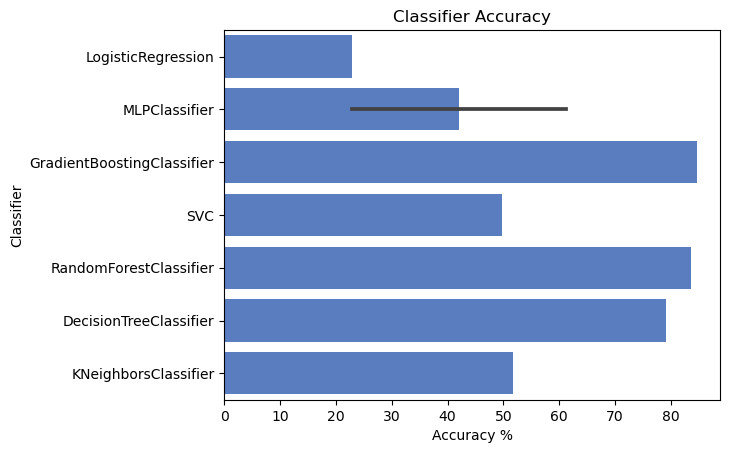

In [9]:
sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')

plt.title('Classifier Accuracy')

plt.show()
